# Import tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Create data frame

In [2]:
df = pd.read_csv('dataset/greenhouse-gas-emissions-in-the-netherlands/emission.csv', encoding='latin1', 
                 delimiter = ';')

In [3]:
df.head()

ID    Bronnen  Perioden   CO2_1    CH4_2  N2O_3
0   0  T001176    1990JJ00  163120  1278.17  59.49
1   1  T001176    1995JJ00  173520  1192.41  59.84
2   2  T001176    2000JJ00  172290   975.64  53.01
3   3  T001176    2001JJ00  177390   949.16  49.71
4   4  T001176    2002JJ00  176670   904.27  47.01

In [4]:
df.describe()

ID          CO2_1        CH4_2       N2O_3
count  520.000000     520.000000   520.000000  520.000000
mean   259.500000   25673.019231   129.603038    5.987808
std    150.255338   40799.113750   276.269489   12.383163
min      0.000000      30.000000     0.000000    0.000000
25%    129.750000    1165.000000     0.120000    0.020000
50%    259.500000   10065.000000     2.775000    0.145000
75%    389.250000   33080.000000    21.495000    1.035000
max    519.000000  182440.000000  1278.170000   59.840000

In [5]:
df.describe()

ID          CO2_1        CH4_2       N2O_3
count  520.000000     520.000000   520.000000  520.000000
mean   259.500000   25673.019231   129.603038    5.987808
std    150.255338   40799.113750   276.269489   12.383163
min      0.000000      30.000000     0.000000    0.000000
25%    129.750000    1165.000000     0.120000    0.020000
50%    259.500000   10065.000000     2.775000    0.145000
75%    389.250000   33080.000000    21.495000    1.035000
max    519.000000  182440.000000  1278.170000   59.840000

In [6]:
values = df['Bronnen'].value_counts().keys().tolist()
counts = df['Bronnen'].value_counts().tolist()
d = {'Bronnen' : values, 'COUNT' : counts}
df_offense = pd.DataFrame(data=d)
df_offense.head()

Bronnen  COUNT
0  A025430       20
1  1050010       20
2  A025446       20
3  301100        20
4  A025423       20

In [7]:
df['Bronnen'].unique()

array(['T001176  ', 'A025447  ', '800044   ', '305800   ', '320300   ',
       '346700   ', '800045   ', '320705   ', '328100   ', 'A025441  ',
       '350000   ', '1050010  ', '800051   ', '301100   ', 'A025446  ',
       'A025421  ', 'A025422  ', 'A025423  ', 'A025424  ', 'A025425  ',
       'A025428  ', 'A025429  ', 'A025430  ', 'A025431  ', 'A025432  ',
       'A025433  '], dtype=object)

# Visualisasi Data

In [8]:
df_by_year = df.drop(['ID'], axis=1)
year = df['Perioden'].astype(str).str[0:4].tolist()
df_by_year = df_by_year.groupby(['Perioden']).sum()
year = [ int(x) for x in year ]
df_by_year['Year'] = sorted(set(year))
df_by_year['Total'] = df_by_year.sum(axis=1)
df_by_year.drop(['CO2_1', 'CH4_2', 'N2O_3'], axis=1, inplace=True)
df_by_year.head()

Year      Total
Perioden                 
1990JJ00  1990  638908.32
1995JJ00  1995  677540.43
2000JJ00  2000  674563.51
2001JJ00  2001  693604.83
2002JJ00  2002  691306.17

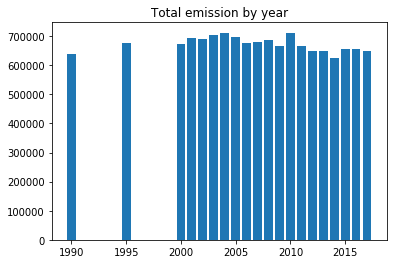

In [9]:
plt.bar(x='Year', height='Total', data=df_by_year)
plt.title('Total emission by year')
plt.show()

In [10]:
# Data frame by sector
df_by_sector = df.drop(['ID'], axis=1)
df_by_sector = df_by_sector.groupby(['Bronnen']).sum()
df_by_sector['Sector'] = df['Bronnen'].unique()
df_by_sector['Total'] = df_by_sector.sum(axis=1)
df_by_sector.drop(['CO2_1', 'CH4_2', 'N2O_3'], axis=1, inplace=True)
df_by_sector.head()

Sector      Total
Bronnen                        
1050010    T001176    396637.33
301100     A025447    163403.75
305800     800044      36400.58
320300     305800     226750.36
320705     320300     350905.44

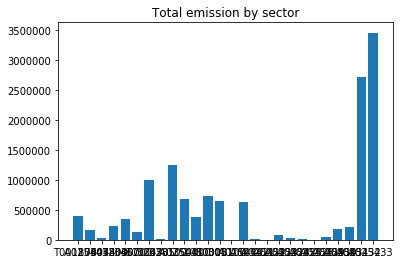

In [11]:
plt.bar(x='Sector', height='Total', data=df_by_sector)
plt.title('Total emission by sector')
plt.show()

# Statistical description

## By year

In [12]:
print(df_by_year['Total'].describe(),'\nmode :', '\nvariance : ', 
      df_by_year['Total'].var(), '\nSkewness : ', df_by_year['Total'].skew(),'\nKurtosis : ', 
      df_by_year['Total'].kurt())

count        20.000000
mean     673030.762000
std       24537.203621
min      625004.180000
25%      654572.955000
50%      675922.360000
75%      691880.835000
max      711722.460000
Name: Total, dtype: float64 
mode : 
variance :  602074361.5486584 
Skewness :  -0.09362830717608246 
Kurtosis :  -0.7736203714941579


## By sector

In [13]:
print(df_by_sector['Total'].describe(),'\nmode :', '\nvariance : ', 
      df_by_sector['Total'].var(), '\nSkewness : ', df_by_sector['Total'].skew(),'\nKurtosis : ', 
      df_by_sector['Total'].kurt())

count    2.600000e+01
mean     5.161722e+05
std      8.342050e+05
min      9.000000e+02
25%      2.569875e+04
50%      1.991356e+05
75%      6.464043e+05
max      3.454289e+06
Name: Total, dtype: float64 
mode : 
variance :  695898029489.817 
Skewness :  2.6250783426946698 
Kurtosis :  7.003583041727234


# Distribusi peluang

#### Distribusi peluang yang digunakan : Distribusi gamma, karena dataset merupakan data kontinu.

# Jawaban pertanyaan

## A

In [14]:
df_bron = df[df['ID'] < 20]
df_bron.mean()
co2 = df_bron['CO2_1'].mean()
ch4 = df_bron['CH4_2'].mean()
n20 = df_bron['N2O_3'].mean()

In [15]:
print('Ekspektasi Total dari Sektor T001176 Emisi yang menyebabkan pemanasan global sebesar',co2+ch4+n20 )

Ekspektasi Total dari Sektor T001176 Emisi yang menyebabkan pemanasan global sebesar 172714.43


## B

### i

In [16]:
df_bron1 = df[(df['ID'] >= 60) & (df['ID'] <= 79)]
df_bron1.mean()
co2 = df_bron1['CO2_1'].mean()
ch4 = df_bron1['CH4_2'].mean()
n20 = df_bron1['N2O_3'].mean()

In [17]:
print('Ekspektasi Emisi dari Sektor 305800 untuk rata-rata emisi gas tidak lebih dari 1500 sebesar',co2+ch4+n20 )

Ekspektasi Emisi dari Sektor 305800 untuk rata-rata emisi gas tidak lebih dari 1500 sebesar 1820.029


### ii

In [18]:
df_bron2 = df[(df['ID'] >= 100) & (df['ID'] <= 119)]
df_bron2.mean()
co2 = df_bron2['CO2_1'].mean()
ch4 = df_bron2['CH4_2'].mean()
n20 = df_bron2['N2O_3'].mean()

In [19]:
print('Ekspektasi Emisi dari Sektor 346700 untuk rata-rata emisi gas tidak lebih dari 35000 sebesar',co2+ch4+n20 )

Ekspektasi Emisi dari Sektor 346700 untuk rata-rata emisi gas tidak lebih dari 35000 sebesar 49630.5145


## C

In [20]:
# Mencari confidence interval CO2
from scipy.stats import sem, t
from scipy import mean
confidence = 0.90
data = df['CO2_1'].tolist()

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
end = m + h

print("Confidence interval 90% adalah ", start, " sampai ", end)

Confidence interval 90% adalah  22724.851379649233  sampai  28621.187081889228
